In [40]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler
from statistics import mean 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot
from pyts.datasets import load_gunpoint

In [41]:
d = pd.read_csv('processedData.csv')
d.head()

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  X172  \
0  135  190  229  223  192  125   55   -9  -33  -38  ...   -17   -15   -31   
1  386  382  356  331  320  315  307  272  244  232  ...   164   150   146   
2  -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    57    64    48   
3 -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -82   -81   -80   
4   -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...     4     2   -12   

   X173  X174  X175  X176  X177  X178  class  
0   -77  -103  -127  -116   -83   -51      0  
1   152   157   156   154   143   129      1  
2    19   -12   -30   -35   -35   -36      0  
3   -77   -85   -77   -72   -69   -65      0  
4   -32   -41   -65   -83   -89   -73      0  

[5 rows x 179 columns]

In [42]:
y = d['class'] #sets y to be class column 
X = d.iloc[:,0:(d.shape[1]-1)] #sets X to be dataset with class column removed 

In [43]:
X = X.iloc[0:2000,:]
y = y.iloc[0:2000]

In [44]:
print(X.shape)
y.shape

(2000, 178)


(2000,)

In [45]:
X

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X169  X170  X171  \
0     135  190  229  223  192  125   55   -9  -33  -38  ...     8   -17   -15   
1     386  382  356  331  320  315  307  272  244  232  ...   168   164   150   
2     -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    29    57    64   
3    -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -80   -82   -81   
4      -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...    10     4     2   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
1995    6   12   19   28   23   15    6   -7  -14  -20  ...    -7   -11   -16   
1996  -48  -89  -97  -77  -79  -69  -63  -49  -39  -22  ...   -72   -45   -25   
1997  703  700  713  700  668  613  554  487  425  381  ...   232   194   157   
1998   -8   -9  -13  -20  -15  -10   -3    2   -2   -2  ...   -91   -74   -72   
1999 -279 -325 -348 -316 -272 -228 -219 -244 -296 -329  ...  -235  -233  -182   

      X172  X173  X174  X175  X176  X177  X178  
0      -31   -77  -103  -127  -116   -83   -51  
1      146   152   157   156   154   143   129  
2       48    19   -12   -30   -35   -35   -36  
3      -80   -77   -85   -77   -72   -69   -65  
4      -12   -32   -41   -65   -83   -89   -73  
...    ...   ...   ...   ...   ...   ...   ...  
1995   -22   -16   -11    -4     0     2     6  
1996   -31   -76   -99  -118  -100   -92  -103  
1997   110    66    29     1    -5    -7   -15  
1998   -64   -78   -83   -80   -77   -77   -83  
1999   -84     3    78   108   116   122   113  

[2000 rows x 178 columns]

In [46]:
# Recurrence plot transformation
rp = RecurrencePlot(threshold='point', percentage=20)
X_rp = rp.fit_transform(X)

In [47]:
X_rp.shape

(2000, 178, 178)

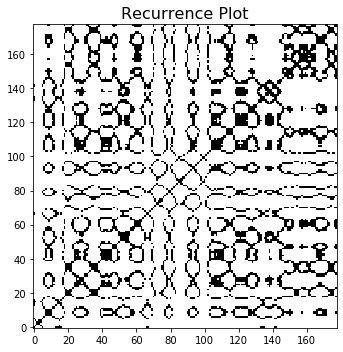

In [39]:
# Show the plot for the first time series
plt.figure(figsize=(5, 5))
plt.imshow(X_rp[0], cmap='binary', origin='lower')
plt.title('Recurrence Plot', fontsize=16)
plt.tight_layout()
plt.show()

In [76]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X) 
X = scaler.transform(X)

In [55]:
X_rp[0].flatten().shape

(31684,)

In [95]:
#Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [96]:
from sklearn.neighbors import KNeighborsClassifier 
modelKNN = KNeighborsClassifier()   
modelKNN.fit(X_train, y_train)
print(classification_report(y_test,modelKNN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       318
           1       0.97      0.38      0.54        82

    accuracy                           0.87       400
   macro avg       0.92      0.69      0.73       400
weighted avg       0.88      0.87      0.85       400



In [97]:
from sklearn import svm
modelSVM = svm.SVC(gamma=0.001, C=100.) 
modelSVM.fit(X_train, y_train)
print(classification_report(y_test,modelSVM.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       318
           1       0.00      0.00      0.00        82

    accuracy                           0.80       400
   macro avg       0.40      0.50      0.44       400
weighted avg       0.63      0.80      0.70       400



c:\program files\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
##Logistic regression: 
from sklearn import linear_model
modelLR = linear_model.LogisticRegression(C=1e5, max_iter=1000)    
modelLR.fit(X_train, y_train)
print(classification_report(y_test, modelLR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90       318
           1       0.70      0.32      0.44        82

    accuracy                           0.83       400
   macro avg       0.77      0.64      0.67       400
weighted avg       0.82      0.83      0.81       400



c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [99]:
##Random forests
from sklearn.ensemble import RandomForestClassifier
modelRF=RandomForestClassifier(n_estimators=1000)   
modelRF.fit(X_train, y_train)
print(classification_report(y_test, modelRF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       318
           1       0.93      0.84      0.88        82

    accuracy                           0.95       400
   macro avg       0.95      0.91      0.93       400
weighted avg       0.95      0.95      0.95       400



In [100]:
##Neural network: 
from sklearn.neural_network import MLPClassifier
modelNN = MLPClassifier(hidden_layer_sizes=(5,5,5), max_iter=500) 
modelNN.fit(X_train, y_train)
print(classification_report(y_test,modelNN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       318
           1       0.72      0.26      0.38        82

    accuracy                           0.83       400
   macro avg       0.78      0.62      0.64       400
weighted avg       0.81      0.83      0.79       400



In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier 
modelKNN = KNeighborsClassifier()   

In [ ]:
##Logistic regression: 
from sklearn import linear_model
modelLR = linear_model.LogisticRegression(C=1e5, max_iter=1000)  

In [ ]:
##Random forests
from sklearn.ensemble import RandomForestClassifier
modelRF=RandomForestClassifier(n_estimators=1000)  

In [ ]:
##Neural network: 
from sklearn.neural_network import MLPClassifier
modelNN = MLPClassifier(hidden_layer_sizes=(5,5,5), max_iter=500) 

In [ ]:
from CVreportingFramework import hugeFramework
hugeFramework(modelKNN, modelLR, modelNN, modelRF, X, y)